### 1  Simulate the trajectory up to t = 60 s (1 min) by using three values of the driving force:  0.0, 0.5 and 1.2. Plot the angle θ and angular velocity ω as a function of time in separate panels on top of each other. Limit the possible values of θ between [-π,π], i.e. add or subtract 2π in case it is necessary.

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc

"""Defining functions"""
#Runge Kutta with extra input for q and omega_D
def Kutta4(f,t0,y0,h,nsteps,Fd,q=1,omega_D=1):
    Y=np.zeros((nsteps,2))  #2D array. Y[:,0] is theta values and Y[:,1] is omega values 
    Y[0]=y0 #initial values
    
    T=np.linspace(t0, t0 + h*nsteps, nsteps) #array of time values 
    
    for i in range(nsteps-1): 
        t=i*h
        F1= f(Y[i],t,q,omega_D,Fd)
        F2= f(Y[i] + h/2* F1,t,q,omega_D,Fd)
        F3= f(Y[i] + h/2* F2,t,q,omega_D,Fd)
        F4= f(Y[i] + h*F3,t,q,omega_D,Fd)
        
        Y[i+1]= Y[i] + h/6*(F1+2*F2+2*F3+F4) #calculating the new theta and omega values
        
    return Y,T #return array of theta and omega values, and time list

"""Defining constants and initial values"""
q0=1 #default damping parameter
delta_t=0.01 #value for each timestep
nsteps =int(10/delta_t) #number of timesteps
theta0 = 0.2 #initial value of the anlge theta
omega0 = 0 #inital value for the pendulums angular velocity 
x0 = np.array([theta0,omega0]) #array of the initial values
g=sc.g #gravitational accelration
l=1 #length of pendulum
phi = np.pi/2 #phase shift (since it starts at its heighest point)


def f_forced(w,t,q,omega_D,Fd):
    return np.array([w[1],-q*w[1]-g/l*w[0]+Fd*np.sin(omega_D*t)])

#Function to be used in Runge Kutta
#takes in array of theta and the derivative of theta
#returns array of the derivative of theta and the double derivative of theta

ValueError: x and y must have same first dimension, but have shapes (60,) and (2,)

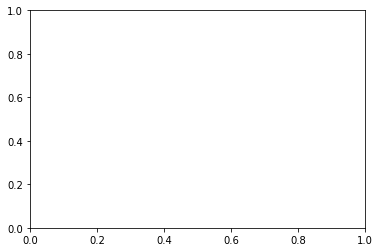

In [11]:
Fd_list=np.array([0.0,0.5,1.2])
t_max=60
tlist=np.arange(0,60,1)
h=1

for i in range(len(Fd_list)):
    X,T=Kutta4(f_forced,0,0,h,t_max,Fd_list[i])
    
    
    plt.plot(tlist, X[0])
    